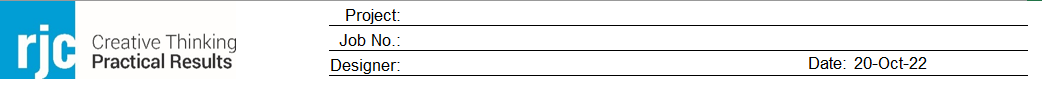

# **Steel Beam Design**

In [31]:
# Basic imports
import forallpeople
import handcalcs.render
forallpeople.environment('structural',top_level=True)
import math 
from math import sqrt, sin, tan
import pandas as pd
import pycba as cba  # The main package
import numpy as np  # For arrays
import matplotlib.pyplot as plt  # For plotting
from IPython import display  # For images in this notebook

In [32]:
def CISC_database_reader(filename:str,I_check = 1):
    '''
    Collects all the available W sections in Canada, stores them in a list and 
    Returns the list of W sections from CISC databse.
    '''
    df = pd.read_excel(filename,skipfooter =2)
    mask2 = df.loc[:,"Avl"]== 'a'                               # This function will only store all the W sections that are readily available in Canada and commonly used
    df_sort = df.loc[mask2,["Ds_i","Ds_m","D","B","T","W","BT","HW",
                        "A_Th","Ix","Sx","Zx","Iy",
                       "Sy","Zy","J","Cw","Mass"]]
    mask3 = df.loc[:,"Ix"]>=I_check
    df_sort = df.loc[mask3,["Ds_i","Ds_m","D","B","T","W","BT","HW",
                        "A_Th","Ix","Sx","Zx","Iy",
                       "Sy","Zy","J","Cw","Mass"]]
    df_sort = df_sort.sort_values("Mass")
    df_sort
    
    return df_sort

In [33]:
def Most_economical_section(filename):
    '''
    Collects all the available W sections in Canada, stores them in a list and 
    Returns the list of W sections from CISC databse based on Ix value from low to high.
    '''
    get_section_list = CISC_database_reader(filename, I_check)
    Economical_section_list = get_section_list.sort_values("Mass")
    return Economical_section_list

In [34]:
def List_of_selected_depth(filename,selected_depth = "W",Criteria = "Ix"):
    '''
    List all W sections based on specific depth selected and also the sorting of data canbe controlled by using criteria. 
    If no criteria is selected, it will sort the values based on Ix
    '''
    df_eco = CISC_database_reader(filename, I_check)
    section_list = df_eco[df_eco['Ds_i'].str.startswith(selected_depth)]
    section_list = section_list.sort_values(Criteria)
    return section_list

## **Input values**

In [35]:
%%render params
DL = 1.9*kPa                    # Dead load
LL = 1.9*kPa                     # Live Load
T_w = 25/3.28*m                   # Tributary width 
L_s = 26/3.28*m                   # Span length 
E = 200000*MPa                    # Modulus of Elasticity 

<IPython.core.display.Latex object>

## **Factored moment calculation**

In [36]:
%%render 2 short
w_f = 1.25*(DL*T_w)+1.5*(LL*T_w)
M_f = w_f*L_s**2/8

<IPython.core.display.Latex object>

## **Required Moment of Inertia (I_req)**

In [37]:
%%render 2
w_flive = LL*T_w
Delta_LL = L_s/480

<IPython.core.display.Latex object>

In [38]:
%%render 2 short

I_req = (5*w_flive*L_s**4)/(384*E*Delta_LL)*10**-6

<IPython.core.display.Latex object>

In [39]:
%%render 2
I_check = I_req/mm**4

<IPython.core.display.Latex object>

In [40]:
## Input file name and other input varible as required

In [41]:
filename = "W_CISC.xlsm"
selected_depth = "W8"
Criteria = "Mass"

In [42]:
df = CISC_database_reader(filename,I_check)

In [43]:
df_eco = Most_economical_section(filename)
df_section = List_of_selected_depth(filename,selected_depth)

## **Most economincal Section list**

In [44]:
df_eco.head(5)

,Ds_i,Ds_m,D,B,T,W,BT,HW,A_Th,Ix,Sx,Zx,Iy,Sy,Zy,J,Cw,Mass
169,W18x35,W460x52,450,152,10.8,7.6,7.04,56.37,6620,212.0,942.0,1090,6.34,83.4,131.0,209.0,306.0,52
178,W16x36,W410x54,403,177,10.9,7.5,8.12,50.83,6800,186.0,923.0,1050,10.10,114.0,177.0,225.0,388.0,54
177,W16x40,W410x60,407,178,12.8,7.7,6.95,49.53,7580,216.0,1060.0,1190,12.00,135.0,209.0,327.0,468.0,60
168,W18x40,W460x60,455,153,13.3,8.0,5.75,53.55,7580,255.0,1120.0,1280,7.96,104.0,163.0,334.0,388.0,60
146,W21x44,W530x66,525,165,11.4,8.9,7.24,56.43,8370,351.0,1340.0,1560,8.57,104.0,166.0,320.0,565.0,66


## **Section list based on depth (D)**

In [45]:
df_section.head(5)

,Ds_i,Ds_m,D,B,T,W,BT,HW,A_Th,Ix,Sx,Zx,Iy,Sy,Zy,J,Cw,Mass


## **Selected section**

In [46]:
while True:
    try:
        Section = input('Enter section name from sections column:')
    except valueError:
        print('Data Input Error! Try Again')
    else:
        break

Enter section name from sections column: W18x35


In [47]:
mask = df.loc[:,"Ds_i"] == Section

In [48]:
df_section = df.loc[mask,["Ds_i","Ds_m","D","B","T","W","BT","HW",
                        "A_Th","Ix","Sx","Zx","Iy",
                       "Sy","Zy","J","Cw"]]
df_section

,Ds_i,Ds_m,D,B,T,W,BT,HW,A_Th,Ix,Sx,Zx,Iy,Sy,Zy,J,Cw
169,W18x35,W460x52,450,152,10.8,7.6,7.04,56.37,6620,212.0,942.0,1090,6.34,83.4,131.0,209.0,306.0


In [49]:
Zx = df_section.loc[:,'Zx'].unique()
Zx = Zx[0]
Sx = df_section.loc[:,'Sx'].unique()
Sx = Sx[0]
Ix = df_section.loc[:,'Ix'].unique()
Ix = Ix[0]

## **Check section class for beam flange**

In [50]:
bf = df_section.loc[:,'B'].unique()
bf = bf[0]/2
tf = df_section.loc[:,'T'].unique()
tf = tf[0]
F_y = 345*MPa

In [51]:
%%render
x = bf/tf
Class_1 = (145/sqrt(F_y))
Class_2 = (170/sqrt(F_y))
Class_3 =(200/sqrt(F_y))

<IPython.core.display.Latex object>

In [52]:
if (bf/tf)<=(145/sqrt(F_y)):
    Section_class = 1    
    print('This is a Class 1 section')
elif ((bf/tf)<=(170/sqrt(F_y))) and ((bf/tf)>(145/sqrt(F_y))):
    Section_class = 2
    print('This is a Class 2 section')
elif ((bf/tf)<=(200/sqrt(F_y))) and ((bf/tf)>(170/sqrt(F_y))):
    Section_class = 3
    print('This is a Class 3 section')

This is a Class 1 section


## **Check section class for beam web**

In [53]:
d = df_section.loc[:,'D'].unique()
d = d[0]
tw = df_section.loc[:,'W'].unique()
tw = tw[0]

In [54]:
%%render
y = d/tw
Class_1 = (1100/sqrt(F_y))
Class_2 = (1700/sqrt(F_y))
Class_3 =(1900/sqrt(F_y))

<IPython.core.display.Latex object>

In [55]:
if (d/tw)<=(1100/sqrt(F_y)):
    print('This is a Class 1 section')
elif ((d/tw)<=(1700/sqrt(F_y))) and ((d/tw)>(1900/sqrt(F_y))):
    print('This is a Class 2 section')
elif ((d/tw)<=(1900/sqrt(F_y))) and ((d/tw)>(1700/sqrt(F_y))):
    print('This is a Class 3 section')

This is a Class 1 section


## **Moment resistance of selected section**

In [56]:
%%render
phi_s = 0.9
F_y = 345*MPa
Z_x= Zx*10**3*mm**3
S_x= Sx*10**3*mm**3

<IPython.core.display.Latex object>

In [57]:
M_r_zx = phi_s*F_y*Z_x
M_r_sx = phi_s*F_y*S_x

In [58]:
if Section_class == 1 or 2:
    M_r = M_r_zx
else:
    M_r = M_r_sx

In [59]:
%%render
if Section_class == 1 or 2: M_r = phi_s*F_y*Z_x
else: M_r = phi_s*F_y*S_x

<IPython.core.display.Latex object>

In [60]:
print('-'*100)
print('Result Summary')
print('-'*100)
print('Dead Load, DL = ',DL)
print('Live/Snow Load, LL = ',LL)
print('Tributary width, Tw = ',T_w)
print('Span Length, Ls = ',L_s)

## Check if the section satisfies both moment and inertia criteria

if (M_r>M_f) and (Ix>I_check):
    print('This section is adequate',round(M_r,1),'>',round(M_f,1))
    print('Moment of Inertia', Ix,'mm^4 >',round(I_check,2),'mm^4')
elif (M_r>M_f) and (Ix<I_check):
    print('Moment resistance',round(M_r,1),'>',round(M_f,1))
    print('Moment of Inertia', Ix,'mm^4 <',round(I_check,2),'mm^4') 
    print('Please select another section!') 
elif (M_r<M_f) and (Ix>I_check):
    print('Moment resistance',round(M_r,1),'<',round(M_f,1))
    print('Moment of Inertia', Ix,'mm^4 >',round(I_check,2),'mm^4') 
    print('Please select another section!')  
elif (M_r<M_f) and (Ix<I_check):
    print('Moment resistance',round(M_r,1),'<',round(M_f,1))
    print('Moment of Inertia', Ix,'mm^4 <',round(I_check,2),'mm^4') 
    print('Please select another section!') 

----------------------------------------------------------------------------------------------------
Result Summary
----------------------------------------------------------------------------------------------------
Dead Load, DL =  1.190 kPa
Live/Snow Load, LL =  1.550 kPa
Tributary width, Tw =  7.622 m
Span Length, Ls =  7.927 m
This section is adequate 338.4 kN·m > 228.2 kN·m
Moment of Inertia 212.0 mm^4 > 183.89 mm^4
